In [1]:
from glob import glob
import os
import numpy as np
import pandas as pd
import random



In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
num_classes=2

In [3]:

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, MaxPooling2D ,Convolution2D,Dropout
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [4]:
# Initialising the CNN
model = Sequential()

# Convolution Layers
model.add(Convolution2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu',data_format='channels_last'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Convolution2D(64, (3, 3), input_shape = (64, 64, 3), activation = 'relu',data_format='channels_last'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Convolution2D(128, (3, 3), activation='relu', input_shape=(64,64,3), data_format='channels_last'))
model.add(MaxPooling2D(pool_size = (2,2)))
# Flattening
model.add(Flatten())

#Full Connection
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation = 'softmax'))

# Compiling the CNN
from keras import optimizers
adam = optimizers.adam(lr=0.0001)
model.compile( optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


W0728 15:12:59.385635 198296 deprecation.py:506] From C:\Users\sirish\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Using TensorFlow backend.


In [5]:
# Path to data
data_dir  = r'C:\Users\sirish\Downloads\chest_xray'
train_dir = r'C:\Users\sirish\Downloads\chest_xray\train'
test_dir  = r'C:\Users\sirish\Downloads\chest_xray\test'
val_dir   = r'C:\Users\sirish\Downloads\chest_xray\val'

# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = r'C:\Users\sirish\Downloads\chest_xray\train\NORMAL'
pneumonia_cases_dir = r'C:\Users\sirish\Downloads\chest_xray\train\PNEUMONIA'

print("Datasets:",os.listdir(data_dir))
print("Train:\t", os.listdir(train_dir))
print("Test:\t", os.listdir(test_dir))

Datasets: ['.DS_Store', 'test', 'train', 'val']
Train:	 ['.DS_Store', 'NORMAL', 'PNEUMONIA']
Test:	 ['NORMAL', 'PNEUMONIA']


In [6]:
# Get the list of all the images
normal_cases = glob(normal_cases_dir+'/*.jpeg')
pneumonia_cases = glob(pneumonia_cases_dir+'/*.jpeg')


In [7]:
# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

In [8]:
# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    train_data.append((img, 1))


In [9]:
# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)


In [10]:
image_size = 64
nb_train_samples = 5216 # number of files in training set
batch_size = 32

In [11]:
EPOCHS = 20
STEPS = nb_train_samples / batch_size

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
       directory = train_dir,
       target_size = (image_size, image_size),
       batch_size = batch_size,
       class_mode = 'categorical')


Found 5216 images belonging to 2 classes.


In [13]:

test_generator = test_datagen.flow_from_directory(
       directory = test_dir,
       target_size = (image_size, image_size),
       batch_size = 1,
       shuffle=False,
       class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [14]:
model.fit_generator(
       train_generator, # specify where model gets training data
       epochs = EPOCHS,
       steps_per_epoch=STEPS,
       validation_data=test_generator) # specify where model gets validation data

Epoch 1/20
163/163 [==============================] - 140s 860ms/step - loss: 0.4181 - acc: 0.8098 - val_loss: 0.3558 - val_acc: 0.8478
Epoch 2/20
163/163 [==============================] - 130s 795ms/step - loss: 0.2340 - acc: 0.9015 - val_loss: 0.3145 - val_acc: 0.8862
Epoch 3/20
163/163 [==============================] - 159s 973ms/step - loss: 0.1991 - acc: 0.9235 - val_loss: 0.2671 - val_acc: 0.9022
Epoch 4/20
163/163 [==============================] - 144s 886ms/step - loss: 0.1661 - acc: 0.9383 - val_loss: 0.4557 - val_acc: 0.8542
Epoch 5/20
163/163 [==============================] - 142s 871ms/step - loss: 0.1561 - acc: 0.9392 - val_loss: 0.4908 - val_acc: 0.8381
Epoch 6/20
163/163 [==============================] - 151s 929ms/step - loss: 0.1546 - acc: 0.9402 - val_loss: 0.5540 - val_acc: 0.7804
Epoch 7/20
163/163 [==============================] - 141s 866ms/step - loss: 0.1341 - acc: 0.9480 - val_loss: 0.3691 - val_acc: 0.8926
Epoch 8/20
163/163 [============================

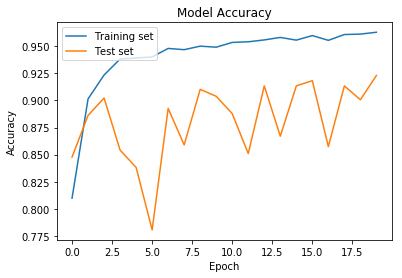

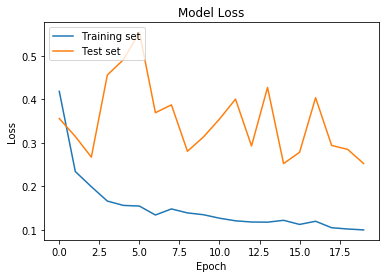

In [19]:
# Accuracy 
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

# Loss 
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [20]:

#Confution Matrix and Classification Report
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_generator,624)
y_pred = np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
print(classification_report(test_generator.classes, y_pred))

Confusion Matrix
[[192  42]
 [  6 384]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       234
           1       0.90      0.98      0.94       390

   micro avg       0.92      0.92      0.92       624
   macro avg       0.94      0.90      0.92       624
weighted avg       0.93      0.92      0.92       624



In [17]:
scores = model.evaluate_generator(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 92.31%


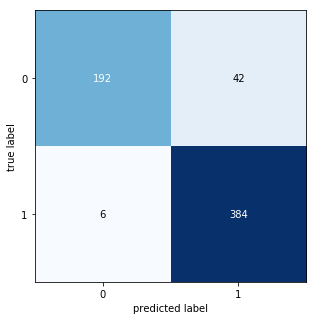

In [21]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(test_generator.classes, y_pred) ,  figsize=(5, 5))
plt.show()